In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# -----------------------------
# 1) 데이터 준비
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", sep=";")


# X, y 분리
X = df.drop("quality", axis=1)
y = df["quality"]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


In [38]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [39]:
df.columns  # 컬럼명 확인

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [40]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [41]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,31,36,36,302,34,57,146,878,23,22,5,3
1,23,42,34,17,38,13,106,471,53,26,12,3
2,43,38,40,101,39,33,69,560,49,21,24,3
3,34,28,32,128,47,59,163,601,42,17,21,3
4,34,28,32,128,47,59,163,601,42,17,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,22,24,29,17,28,26,64,224,50,27,47,3
4894,27,46,36,120,36,73,144,544,38,23,15,2
4895,26,30,19,9,30,33,83,347,22,23,11,3
4896,14,40,30,7,11,21,82,29,57,15,84,4


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [43]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 기본


In [44]:
# -----------------------------
# 3) 모델 학습
# -----------------------------
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [45]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)
knn_y_pred = knn.predict(X_test)

In [46]:
y_test

,quality
1740,6
2658,7
1203,6
3985,6
2945,8
...,...
4393,6
1454,5
2576,5
4501,6


In [47]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)
knn_acc = accuracy_score(y_test, knn_y_pred)

print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))
print("=== KNN Test Accuracy ===")
print(f"K-NN : {knn_acc:.4f}")
print(confusion_matrix(y_test, knn_y_pred))


=== DT Test Accuracy ===
Decision Tree : 0.5908
[[  0   1   2   1   0   0   0]
 [  0   9  14   8   1   1   0]
 [  0  15 174  81  14   7   0]
 [  1  12  81 275  62   9   0]
 [  0   1  15  55 100   5   0]
 [  0   1   1   6   6  21   0]
 [  0   0   0   0   1   0   0]]
=== RF Test Accuracy ===
Random Forest : 0.6776
[[  0   0   1   3   0   0   0]
 [  0   7  18   8   0   0   0]
 [  0   3 191  97   0   0   0]
 [  0   1  50 362  27   0   0]
 [  0   0   4  87  85   0   0]
 [  0   0   1   8   7  19   0]
 [  0   0   0   0   1   0   0]]
=== LR Test Accuracy ===
Logistic Reg. : 0.5173
[[  0   0   1   3   0   0   0]
 [  0   0  19  14   0   0   0]
 [  0   0 135 156   0   0   0]
 [  0   1  75 358   6   0   0]
 [  0   0  16 146  14   0   0]
 [  0   0   7  21   7   0   0]
 [  0   0   0   1   0   0   0]]
=== KNN Test Accuracy ===
K-NN : 0.4449
[[  0   0   1   3   0   0   0]
 [  0   2  18  12   1   0   0]
 [  0   9 136 128  17   1   0]
 [  0   7 128 246  57   2   0]
 [  0   0  24 103  44   5   0]
 [  0  

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# 4. KNN 회귀
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = RandomForestRegressor()
rr.fit(X_train, y_train)
dr = DecisionTreeRegressor()
dr.fit(X_train, y_train)
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

# 가중치(회귀계수)와 절편 확인
print("=========Linear Regression=====")
print("절편(intercept):", lr.intercept_)
print("가중치(coefficients):")
for col, coef in zip(X.columns, lr.coef_):
    print(f"{col}: {coef:.4f}")
#print("=========RandomForestRegressorn=====")
#print("절편(intercept):", rr.intercept_)
#print("가중치(coefficients):")
#for col, coef in zip(X.columns, rr.coef_):
#    print(f"{col}: {coef:.4f}")
#print("=========DecisionTreeRegressor=====")
#print("절편(intercept):", dr.intercept_)
#print("가중치(coefficients):")
#for col, coef in zip(X.columns, dr.coef_):
#    print(f"{col}: {coef:.4f}")
#print("=========KNeighborsRegressor=====")
#print("절편(intercept):", knr.intercept_)
#print("가중치(coefficients):")
#for col, coef in zip(X.columns, knr.coef_):
#    print(f"{col}: {coef:.4f}")

=========Linear Regression=====
절편(intercept): 142.58862718711305
가중치(coefficients):
fixed acidity: 0.0563
volatile acidity: -1.9132
citric acid: 0.1176
residual sugar: 0.0790
chlorides: -0.5979
free sulfur dioxide: 0.0034
total sulfur dioxide: -0.0000
density: -142.6786
pH: 0.6850
sulphates: 0.6019
alcohol: 0.2048


In [49]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

MSE: 0.5793874861746262
R^2 Score: 0.2619326430893053


In [50]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from tensorflow.keras import models, layers

In [51]:


scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values
#X = X.values



In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)




In [53]:
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)



Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3264 - loss: 1.6693 - val_accuracy: 0.5344 - val_loss: 1.1537
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5275 - loss: 1.1461 - val_accuracy: 0.5383 - val_loss: 1.1001
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5526 - loss: 1.0984 - val_accuracy: 0.5421 - val_loss: 1.0684
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5405 - loss: 1.0989 - val_accuracy: 0.5485 - val_loss: 1.0487
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5639 - loss: 1.0637 - val_accuracy: 0.5446 - val_loss: 1.0360
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5613 - loss: 1.0555 - val_accuracy: 0.5536 - val_loss: 1.0383
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5781 - loss: 1.0210 - val_accuracy: 0.5536 - val_loss: 1.0282
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5576 - loss: 1.0490 - val_accuracy: 0.5548 - val_

In [54]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


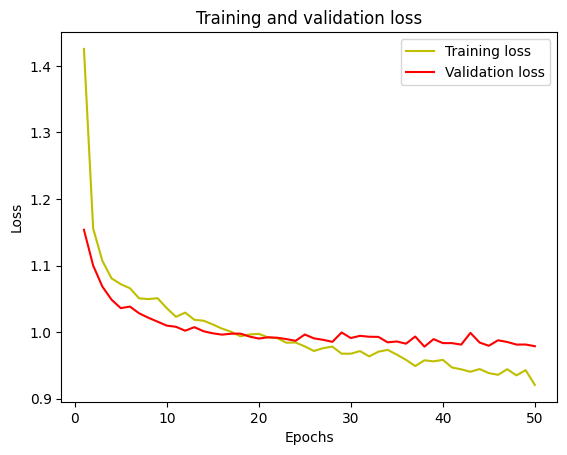

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



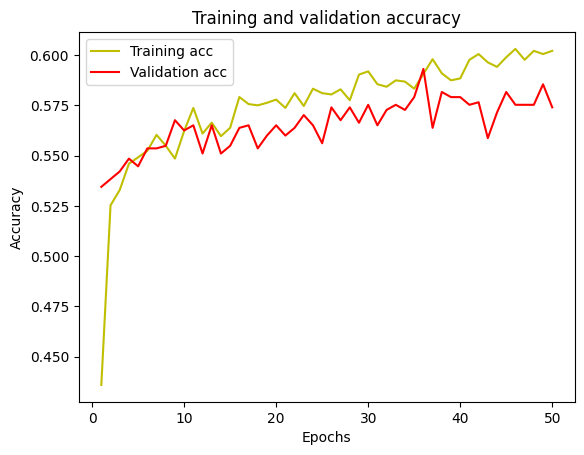

In [56]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [57]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       1.00      0.06      0.11        51
           2       0.62      0.57      0.59       295
           3       0.52      0.78      0.63       409
           4       0.59      0.31      0.40       183
           5       0.00      0.00      0.00        33

    accuracy                           0.56       980
   macro avg       0.62      0.30      0.32       980
weighted avg       0.58      0.56      0.52       980

[[  1   0   4   4   0   0]
 [  0   3  34  14   0   0]
 [  0   0 167 126   2   0]
 [  0   0  64 319  26   0]
 [  0   0   2 125  56   0]
 [  0   0   0  22  11   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
